In [ ]:
#Coles data

import pandas as pd

# Load the Coles dataset
file_path = '/content/Coles_cleaned.csv'
coles = pd.read_csv(file_path)

# Display basic information about the dataset
coles_info = coles.info()  # Overview of columns and data types
coles_head = coles.head()  # Display first few rows to understand the data

# Displaying info and first few rows to the user
coles_info, coles_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20608 entries, 0 to 20607
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_code     20608 non-null  int64  
 1   category         20608 non-null  object 
 2   item_name        20608 non-null  object 
 3   best_price       20608 non-null  float64
 4   best_unit_price  20608 non-null  float64
 5   item_price       20608 non-null  float64
 6   unit_price       20608 non-null  float64
 7   link             20608 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.3+ MB


(None,
    product_code        category  \
 0       4174794  Meat & Seafood   
 1       9224255  Meat & Seafood   
 2       9223332  Meat & Seafood   
 3       7382539  Meat & Seafood   
 4       3091126  Meat & Seafood   
 
                                            item_name  best_price  \
 0       Coles Boneless Pork Leg Roast | approx 2.1kg        14.7   
 1  Cleaver's Organic Grass-Fed Premium Beef Mince...        14.0   
 2  Cleaver's Organic Grass-Fed Extra Lean Beef Mi...        15.0   
 3         The Bare Bird Chicken Thigh Fillets | 480g        13.0   
 4         The Bare Bird Whole Chicken | approx 1.6kg        13.6   
 
    best_unit_price  item_price  unit_price  \
 0            7.001        14.7       7.001   
 1           28.001        14.0      28.001   
 2           30.001        15.0      30.001   
 3           27.081        13.0      27.081   
 4            8.501        13.6       8.501   
 
                                                 link  
 0  https://www.col

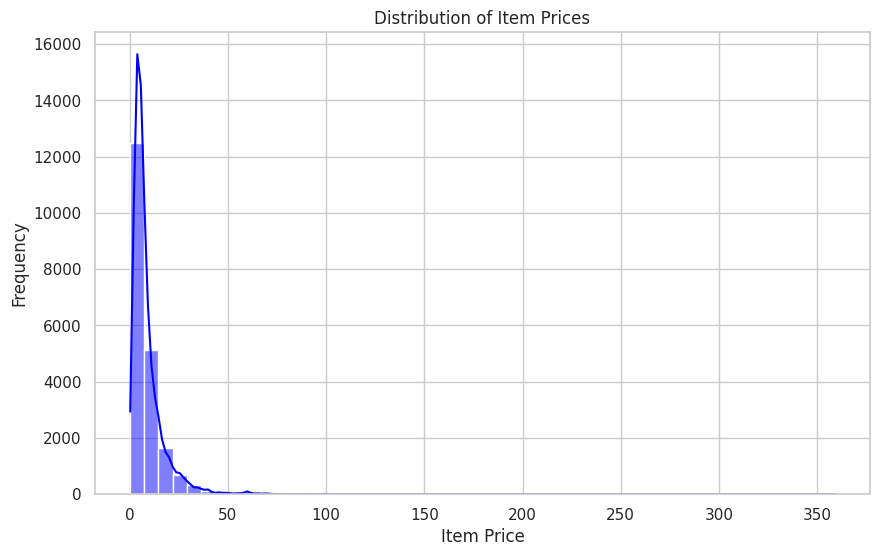

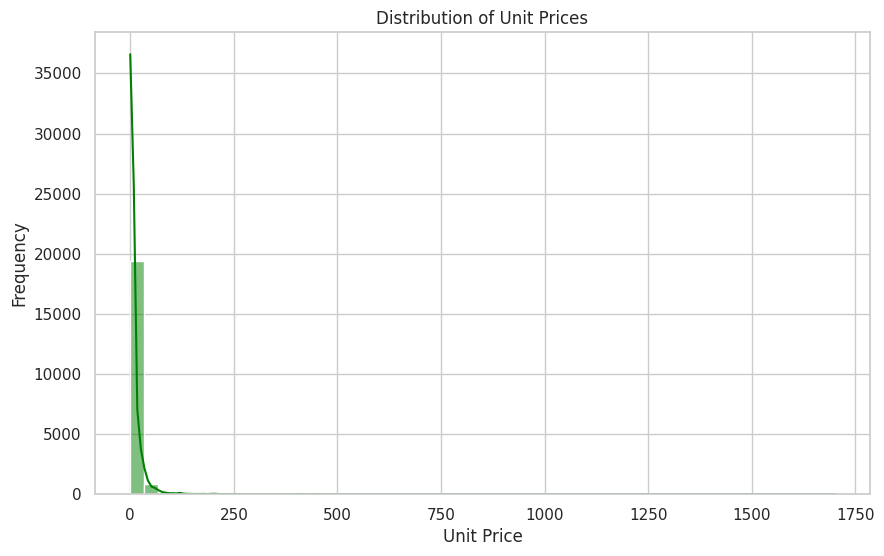

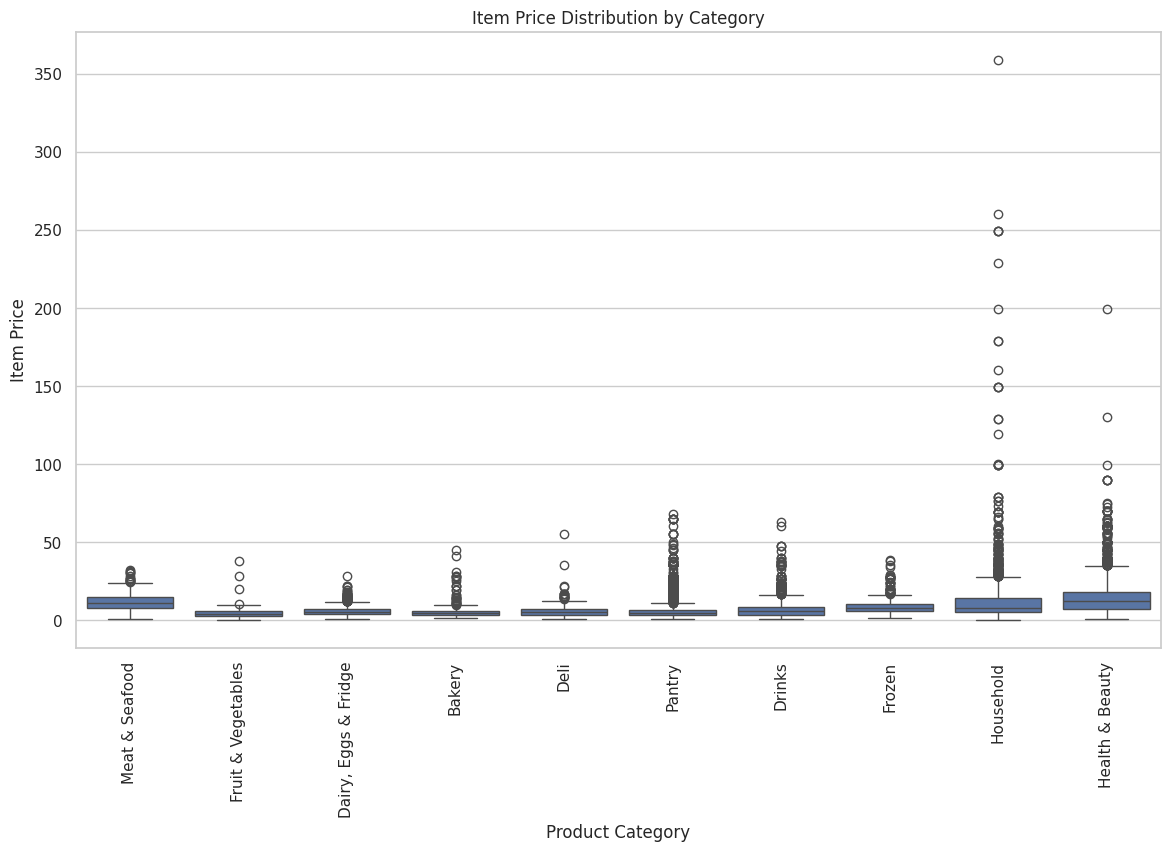

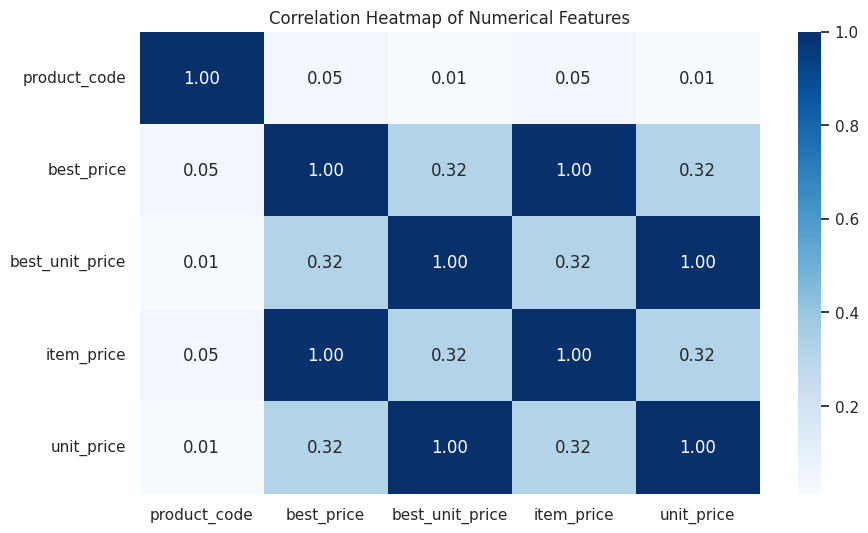

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Plot the distribution of 'item_price' to understand its spread
plt.figure(figsize=(10, 6))
sns.histplot(coles['item_price'], kde=True, bins=50, color='blue')
plt.title('Distribution of Item Prices')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'unit_price' to understand its spread
plt.figure(figsize=(10, 6))
sns.histplot(coles['unit_price'], kde=True, bins=50, color='green')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot to see price variation across different categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='item_price', data=coles)
plt.xticks(rotation=90)
plt.title('Item Price Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Item Price')
plt.show()

# Correlation heatmap focusing only on numerical features
numerical_features = coles.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 6))
sns.heatmap(coles[numerical_features].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [ ]:
# Seperating X, y data for text classification model
X = coles[['item_name', 'unit_price']]
y = coles['category']  # Target


print("Features (X):")
print(X.head())

print("\nTarget (y):")


Features (X):
                                           item_name  unit_price
0       Coles Boneless Pork Leg Roast | approx 2.1kg       7.001
1  Cleaver's Organic Grass-Fed Premium Beef Mince...      28.001
2  Cleaver's Organic Grass-Fed Extra Lean Beef Mi...      30.001
3         The Bare Bird Chicken Thigh Fillets | 480g      27.081
4         The Bare Bird Whole Chicken | approx 1.6kg       8.501

Target (y):
0    Meat & Seafood
1    Meat & Seafood
2    Meat & Seafood
3    Meat & Seafood
4    Meat & Seafood
Name: category, dtype: object


In [ ]:
import re


# preprocessing - to remvoe jargon words, weight from item name #todo
# Function to clean the text
def clean_item_name(text):
    # Remove specific unwanted words like "approx"
    text = re.sub(r'\bapprox\b', '', text, flags=re.IGNORECASE)
    # Remove extra characters like brackets, special symbols, and multiple spaces
    text = re.sub(r'[^\w\s]', '', text)  # Removes special characters
    text = re.sub(r'\s+', ' ', text)    # Removes extra spaces
    return text.strip()  # Strips leading and trailing spaces

# Apply the cleaning function to the 'item_name' column in X
X['item_name'] = X['item_name'].apply(clean_item_name)

# Check the cleaned data
print("Cleaned item_name column:")
print(X['item_name'].head())

Cleaned item_name column:
0                   Coles Boneless Pork Leg Roast 21kg
1    Cleavers Organic GrassFed Premium Beef Mince 500g
2    Cleavers Organic GrassFed Extra Lean Beef Minc...
3             The Bare Bird Chicken Thigh Fillets 480g
4                     The Bare Bird Whole Chicken 16kg
Name: item_name, dtype: object


<ipython-input-19-d2d0e8c8867f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['item_name'] = X['item_name'].apply(clean_item_name)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

text_transformer = TfidfVectorizer()
num_transformer = StandardScaler()

# Combine preprocessors for a hybrid model
preprocessor = ColumnTransformer( transformers=[ ('text', text_transformer, 'item_name'), ('num', num_transformer, ['unit_price']) ] )

# splitting the data
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


# create a classification pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

## model 1

regressionModel = LogisticRegression(max_iter=1000)
# Create a pipeline
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', regressionModel)  # Classn model
])

# Check the pipeline
print(clf_pipeline)

# Train the model
clf_pipeline.fit(X_train, y_train)
print("Model training complete.")

# evaluatie and test
from sklearn.metrics import classification_report, accuracy_score


## performance on training data
print("training data prediction performance")
y_pred_train = clf_pipeline.predict(X_train)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))


print("\nTest Data Performance")
# Predict on the test set
y_pred = clf_pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Training set size: (16486, 2)
Testing set size: (4122, 2)
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'item_name'),
                                                 ('num', StandardScaler(),
                                                  ['unit_price'])])),
                ('classifier', LogisticRegression(max_iter=1000))])
Model training complete.
training data prediction performance
Accuracy: 0.9259978163290065

Classification Report:
                       precision    recall  f1-score   support

              Bakery       0.95      0.85      0.90       465
Dairy, Eggs & Fridge       0.89      0.86      0.88      1401
                Deli       0.69      0.48      0.57       194
              Drinks       0.82      0.76      0.79      1258
              Frozen       0.99      0.85      0.92       881
  Fruit & Vegetables       0.96      0.85      0.90       404
    

In [ ]:
## Model 2
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier()
# Create a pipeline
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', RF_classifier)  # Classn model
])

# Check the pipeline
print(clf_pipeline)

# Train the model
clf_pipeline.fit(X_train, y_train)
print("Model training complete.")

# evaluatie and test
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = clf_pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'item_name'),
                                                 ('num', StandardScaler(),
                                                  ['unit_price'])])),
                ('classifier', RandomForestClassifier())])
Model training complete.
Accuracy: 0.856380397865114

Classification Report:
                       precision    recall  f1-score   support

              Bakery       0.96      0.75      0.84       117
Dairy, Eggs & Fridge       0.83      0.77      0.80       350
                Deli       0.34      0.33      0.34        48
              Drinks       0.58      0.57      0.58       315
              Frozen       0.94      0.83      0.88       221
  Fruit & Vegetables       0.83      0.84      0.84       101
     Health & Beauty       0.95      0.96      0.96       921
           Household       0.92      0.91      

These are Item Catagory Classification Models.

Both logistic, and random forest model have similar ~85% performace. While, Logistic Model has slightly better fit for the data in terms of prediction performance.
on test data, logistic model - precision is marginally better than RF model, and recall is better for RF model than Logisitc model. But overall F1 score for both model shows similar performance.